In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version = 1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [2]:
# Datasets loaded by Scikit-Learn generally have a similar dictionary
# structure, including the following:
# A DESCR key describing the dataset

# A data key containing an array with one row per instance and one
# column per feature

# A target key containing an array with the labels
mnist.frame

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,class
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
69996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
69997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,5


In [3]:
X, y = mnist["data"], mnist["target"].astype(int)  #y is a string array, not integers
print(X.shape)
y.shape

(70000, 784)


(70000,)

In [4]:
#There are 70,000 images, and each image has 784 features.
# This is because each image is 28 × 28 pixels, and each feature simply represents one
# pixel’s intensity, from 0 (white) to 255 (black). Let’s take a peek at one
# digit from the dataset. All you need to do is grab an instance’s feature
# vector, reshape it to a 28 × 28 array, and display it using Matplotlib’s
# imshow() function:

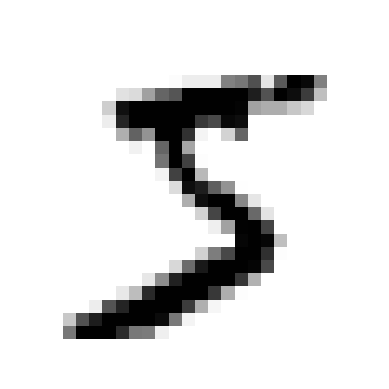

In [5]:
import matplotlib as mpl
import matplotlib.pyplot as plt
temp = X.to_numpy()
some_digit = temp[0]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap="binary")
plt.axis("off")
plt.show()

In [6]:
y[0] ## Indeed its a 5

np.int64(5)

## PREPARING DATASET

In [7]:
# The MNIST dataset is actually already split
# into a training set (the first 60,000 images) and a test set (the last 10,000 images):
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

## Training a Binary Classifier

In [8]:
#Let’s simplify the problem for now and only try to identify one digit
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

# Compares each label in y_train to the number 5.

# Returns a boolean array:

# True → the digit is 5

# False → the digit is NOT 5

from sklearn.linear_model import SGDClassifier
sgd_ins = SGDClassifier(random_state=42)
sgd_ins.fit(X_train, y_train_5)

,loss,'hinge'
,penalty,'l2'
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,1000
,tol,0.001
,shuffle,True
,verbose,0
,epsilon,0.1
,n_jobs,None


In [9]:
sgd_ins.predict([some_digit])

/home/sarvadubey/Desktop/Proj/MNIST Classification/venv/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([ True])

In [10]:
# LESS GO tho it was in trained set meh

## LETS EVALUATE ITS PERFORMANCE

In [11]:
# clone → makes a fresh copy of a model with identical hyperparameters

In [12]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3, shuffle = True, random_state=42)
#But StratifiedKFold does NOT use random_state unless shuffle=True.
for train_index, test_index in skfolds.split(X_train, y_train_5):  #Only testing on 5
    trump_ki_mkc = clone(sgd_ins)      
    X_train_folds = X_train.loc[train_index]
    y_train_folds = y_train_5.loc[train_index]
    X_test_fold = X_train.loc[test_index]
    y_test_fold = y_train_5.loc[test_index]

    trump_ki_mkc.fit(X_train_folds, y_train_folds)
    ans = trump_ki_mkc.predict(X_test_fold) 
    kitne_sahi = sum(ans == y_test_fold)
    print(kitne_sahi / len(ans))
    
    

0.9669
0.91625
0.96785


In [13]:
# Accuracy so high coz ony 10 % data is 5, LUL
# This is simply because only about 10% of the images are 5s, so if you always guess that an image is not a 5,
# you will be right about 90% of the time.

## USING CONFUSION MATRIX

In [14]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_ins, X_train, y_train, cv = 3)


In [15]:
## USING CONFUSION MATRIX FUNCTION 
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)

array([[5915, 6663, 5976, 5314, 6132, 1340, 6045, 5941, 5633, 5620],
       [  68,   23,   58,  150,   83, 4606,  174,   26,  152,   81],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0]])

In [16]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_ins, X_train, y_train_5, cv = 3)
'''
Step 1
Train sgd_clf on 2/3 of X_train with labels y_train_5.
Step 2
Use that trained model to make predictions on the remaining 1/3.
Step 3
Collect predictions for all samples across the 3 folds.
'''

'\nStep 1\nTrain sgd_clf on 2/3 of X_train with labels y_train_5.\nStep 2\nUse that trained model to make predictions on the remaining 1/3.\nStep 3\nCollect predictions for all samples across the 3 folds.\n'

In [17]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5, y_train_pred)
'''               Predicted
             |  Not-5   |    5
Actual ------+----------+---------
Not-5        |  53057   |   1522
5            |   1325   |   4096
'''

'               Predicted\n             |  Not-5   |    5\nActual ------+----------+---------\nNot-5        |  53057   |   1522\n5            |   1325   |   4096\n'

In [18]:
#A perfect classifier would have only true positives and true 
#negatives, so its confusion matrix would have nonzero values 
#only on its main diagonal
y_train_perfect_predictions = y_train_5 # pretend we reached perfection
confusion_matrix(y_train_5, y_train_perfect_predictions)

array([[54579,     0],
       [    0,  5421]])

### Precision of the Classifier
precision = TP / (TP+FP)

TP is the number of true positives, and FP is the number of false positives.

recall = TP / (TP + FN) 

FN = False Negatives

In [19]:
recall = 3530 / (3530 + 1891)
print(recall)

0.6511713705958311


FX Wise

In [20]:
from sklearn.metrics import precision_score, recall_score, f1_score
print(precision_score(y_train_5, y_train_pred))
print(recall_score(y_train_5, y_train_pred))

0.8370879772350012
0.6511713705958311


In [21]:
# When it claims an image represents a 5, it is correct only
# 83.7% of the time. Moreover, it only detects 65.1% of the 5s.

In [22]:
# The F1 score is the harmonic mean of precision and recall
#Because the harmonic mean is dominated by the smaller number.

In [23]:
f1_score(y_train_5, y_train_pred)

0.7325171197343847

## A superb Ananlogy 

Recall = how many actual shoplifters you correctly catch.

recall tells us how many the model successfully found

High recall → you miss very few shoplifters.

Precision = how many of the people you flag are actually shoplifters.

precision tells us how many were actually correct

Low precision → many false alarms.

Scikit-Learn does not let you set the threshold directly, but it does give
you access to the decision scores that it uses to make predictions. Instead
of calling the classifier’s predict() method, you can call its
decision_function() method, which returns a score for each instance,
and then use any threshold you want to make predictions based on those
scores:

In [24]:
y_scores = sgd_ins.decision_function([some_digit])
y_scores

/home/sarvadubey/Desktop/Proj/MNIST Classification/venv/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([2164.22030239])

In [25]:
y_some_digit_pred = (y_scores > 0)
y_some_digit_pred

array([ True])

In [26]:
y_some_digit_pred = (y_scores > 2165)
y_some_digit_pred

array([False])

This confirms that raising the threshold decreases recall. The image
actually represents a 5, and the classifier detects it when the threshold is 0,
but it misses it when the threshold is increased to 2165.

cross_val_predict() function to get the scores of all instances in the
training set, but this time specify that you want to return decision scores

In [27]:
y_scores = cross_val_predict(sgd_ins, X_train, y_train_5, cv=3,method="decision_function")

With these scores, use the precision_recall_curve() function to
compute precision and recall for all possible thresholds

In [28]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_5,y_scores)
# Make it visually

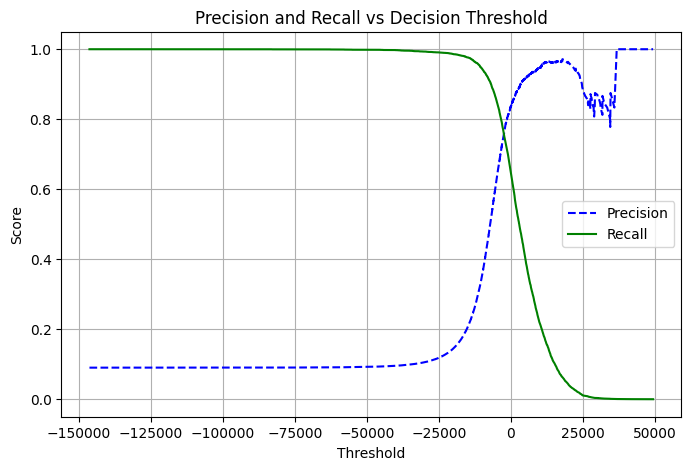

In [29]:
plt.figure(figsize=(8,5))
plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
plt.plot(thresholds, recalls[:-1], "g-", label="Recall") #precisions[:-1] → drops last element because precisions is 1 element longer than thresholds
plt.xlabel("Threshold")
plt.ylabel("Score")
plt.title("Precision and Recall vs Decision Threshold")
plt.legend(loc="best")  #loc="best" automatically chooses the least-cluttered spot.
plt.grid(True)

When you increase the threshold:
Recall always drops, Precision jumps around depending on whether you filtered out a TP or an FP

Text(0.5, 0, 'Recall')

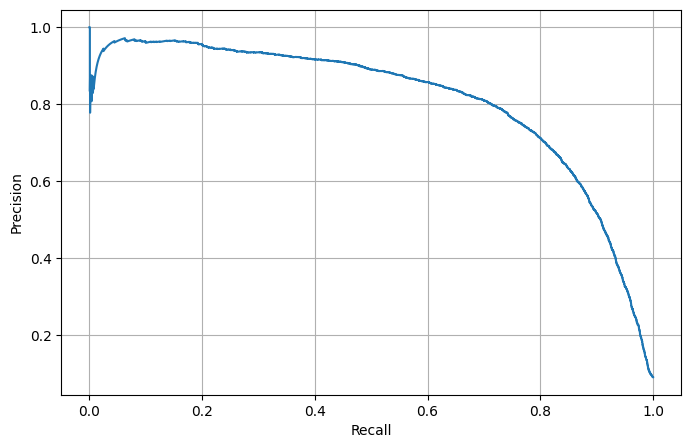

In [30]:
plt.figure(figsize=(8,5))
plt.plot(recalls[:-1], precisions[:-1]) 
plt.grid(True) #Recall against presision
plt.ylabel("Precision")
plt.xlabel("Recall")

In [31]:
# min threshold for certai limit 
import numpy as np
threshold_90_precision = thresholds[np.argmax(precisions >= 0.90)]
threshold_90_precision

np.float64(3370.0194991439557)

In [32]:
y_train_pred_90 = (y_scores >= threshold_90_precision)

In [33]:
precision_score(y_train_5, y_train_pred_90)

0.9000345901072293

In [34]:
recall_score(y_train_5, y_train_pred_90)

0.4799852425751706

## ROC: Receiver Operating Characterstic Curve

In [35]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

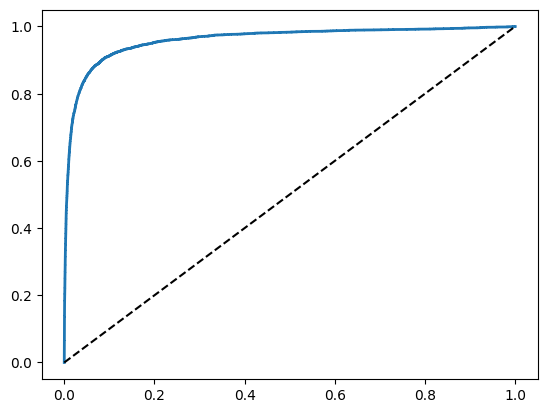

In [36]:
plt.plot(fpr, tpr, linewidth=2, label=None)
plt.plot([0,1], [0,1], 'k--')

In [37]:
# One way to compare classifiers is to measure the area under the curve
# (AUC). A perfect classifier will have a ROC AUC equal to 1, whereas a
# purely random classifier will have a ROC AUC equal to 0.5. Scikit-Learn
# provides a function to compute the ROC AUC:

from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

0.9604938554008616

In [38]:
# For example, looking at the
# previous ROC curve (and the ROC AUC score), you may think that the classifier is
# really good. But this is mostly because there are few positives (5s) compared to the
# negatives (non-5s). In contrast, the PR curve makes it clear that the classifier has
# room for improvement (the curve could be closer to the top-left corner).

## RandomForestClassifier

In [39]:
# Instead, it has a predict_proba()
# method. Scikit-Learn classifiers generally have one or the other, or both.
# The predict_proba() method returns an array containing a row per
# instance and a column per class, each containing the probability that the
# given instance belongs to the given class (e.g., 70% chance that the image
# represents a 5)

In [40]:
from sklearn.ensemble import RandomForestClassifier
jungle_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(jungle_clf, X_train, y_train_5, cv=3, method="predict_proba")

In [41]:
y_probas_forest  ## This instance belongs to class -> YES NO

array([[0.11, 0.89],
       [0.99, 0.01],
       [0.96, 0.04],
       ...,
       [0.02, 0.98],
       [0.92, 0.08],
       [0.94, 0.06]], shape=(60000, 2))

In [42]:
y_scores_forest = y_probas_forest[:, 1] # score = proba of positive class
fpr_forest, tpr_forest, threshold_forest = roc_curve(y_train_5, y_scores_forest)

##### plt.plot(fpr_forest, tpr_forest, linewidth=2, label=None)
plt.plot([0,1], [0,1], 'k--') # RANDOM_JUNGLE
plt.plot(fpr, tpr, "b:") #SGD_INS

In [43]:
roc_auc_score(y_train_5, y_scores_forest)

0.9983436731328145

## TIME TO CONQUER MORE THAN 5 HEHEHE

In [44]:
from sklearn.svm import SVC
svm_md = SVC()
svm_md.fit(X_train, y_train)
svm_md.predict([some_digit]) 

/home/sarvadubey/Desktop/Proj/MNIST Classification/venv/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([5])

In [45]:
some_digit_scores = svm_md.decision_function([some_digit])
some_digit_scores 

/home/sarvadubey/Desktop/Proj/MNIST Classification/venv/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([[ 1.72501977,  2.72809088,  7.2510018 ,  8.3076379 , -0.31087254,
         9.3132482 ,  1.70975103,  2.76765202,  6.23049537,  4.84771048]])

In [46]:
np.argmax(some_digit_scores)

np.int64(5)

In [47]:
svm_md.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [48]:
# DONT RUN
'''from sklearn.multiclass import OneVsRestClassifier
trial = OneVsRestClassifier(SVC())
trial.fit(X_train, y_train)
trial.predict([some_digit]
'''
'''
len(trial.estimators_)
'''

'\nlen(trial.estimators_)\n'

In [49]:
'''
## USING SGD
sgd_ins.fit(X_train, y_train)
sgd_ins.predict([some_digit]) #FUCKED UP TRAINED THE MODEL TWICE
'''

/home/sarvadubey/Desktop/Proj/MNIST Classification/venv/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([3])

In [50]:
# Creating new instance 
from sklearn.linear_model import SGDClassifier
new_sgd = SGDClassifier(random_state=42, shuffle=True)
new_sgd.fit(X_train, y_train)
new_sgd.predict([some_digit]) 

/home/sarvadubey/Desktop/Proj/MNIST Classification/venv/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([3])

In [51]:
new_sgd.decision_function([some_digit])

/home/sarvadubey/Desktop/Proj/MNIST Classification/venv/lib/python3.10/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but SGDClassifier was fitted with feature names
  warnings.warn(


array([[-31893.03095419, -34419.69069632,  -9530.63950739,
          1823.73154031, -22320.14822878,  -1385.80478895,
        -26188.91070951, -16147.51323997,  -4604.35491274,
        -12050.767298  ]])

In [54]:
#Using cross_val_score to approximate
import numpy as np
from sklearn.model_selection import cross_val_score
cross_val_score(new_sgd, X_train, y_train, cv=3, scoring="accuracy")

array([0.87365, 0.85835, 0.8689 ])

In [ ]:
## SCALE IT HEHEHE
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X_train.astype(np.float64))
sgd_scaled = SGDClassifier(random_state=42)
sgd_scaled.fit(X, y_train)
cross_val_score(sgd_scaled, X, y_train, cv=3, scoring="accuracy")